# lab2

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340-2025-fall-1128/Crime_Data_from_2020_to_Present.csv') # load the data from s3
df.head() # shows the top 5 rows

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


## View Data

In [9]:
df.head() # shows the top 5 rows

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [9]:
df.shape # shows the number of rows and columns

(1004991, 28)

In [10]:
df.info() # shows the column names, non-nulls, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

In [11]:
df.describe() # descriptive statistics for each numeric column

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004975e+06,327247.000000,1.004980e+06,69160.000000,2314.000000,64.00000,1.004991e+06,1.004991e+06
mean,2.202215e+08,1.339900e+03,1.069174e+01,1.115633e+03,1.400348e+00,5.001568e+02,2.891706e+01,3.056201e+02,363.955300,4.999174e+02,958.101258,984.015990,991.21875,3.399821e+01,-1.180909e+02
std,1.319718e+07,6.510613e+02,6.110255e+00,6.111605e+02,4.899691e-01,2.052731e+02,2.199272e+01,2.193021e+02,123.734528,2.050736e+02,110.354348,52.350982,27.06985,1.610713e+00,5.582386e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106169e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209159e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311103e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


### View Data Overview

- **Rows and Columns**: The dataset has **1,004,991 rows** and **28 columns**.
- **Kinds of Columns**: There are numeric and text columns in this dataset.
    - Numeric: Integer and float data types (such as Area, Victim Age, Latitude, Longitude).
    - Text: Strings/objects (such as Area Name, Location)
- **First Impressions**:
    - This dataset is very large, with approximately **1 million** entries. This could be good for analysis.
    - Dates are stored as objects, so they might need to be converted to datetime for analysis.
    - There are a significant number of missing values in some of the columns (Weapon Used, Mocodes, Cross Street).

## Explore and Clean Data

In [21]:
df.info() # shows the data types and the number of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

In [15]:
df = df.rename(columns={"DATE OCC": "date", "Crm Cd Desc": "crime"})
df.head()

,DR_NO,Date Rptd,date,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,crime,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [28]:
df.isnull().sum() # shows the number of rows that contain null values

DR_NO                   0
Date Rptd               0
date                    0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
crime                   0
Mocodes            151619
Vict Age                0
Vict Sex           144644
Vict Descent       144656
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677744
Weapon Desc        677744
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935831
Crm Cd 3          1002677
Crm Cd 4          1004927
LOCATION                0
Cross Street       850755
LAT                     0
LON                     0
dtype: int64

In [29]:
df = df.dropna() # drop any null values
df.isnull().sum()

DR_NO             0
Date Rptd         0
date              0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
crime             0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

### Data Cleaning Overview

- I renamed the **DATE OCC** column to **date** and **Crm Cd Desc** to **crime** for clarity.
- Before cleaning, there were several columns that had missing values.
    - Mocodes had 151,619 missing.
    - Vict Sex had 144,644 missing.
    - Vict Descent had 144,656 missing.
    - Weapon Used Cd/Weapon Desc had 677,744 missing.
    - Cross Street had 850,755 missing.
    - Crm Cd 2-4 had a significant number missing when combined.
- To ensure there were missing values, I used **df.isnull().sum()**, which confirmed the missing values. To handle this, I used **df.dropna()**, which removed all rows containing missing values. I ran **df.isnull().sum()** again to check that they were successfully removed. 

## Manipulate the Data

In [3]:
df['crime'] # selects a column

0                                          THEFT OF IDENTITY
1             ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
2                                          THEFT OF IDENTITY
3          THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...
4            THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
                                 ...                        
1004986                            OTHER MISCELLANEOUS CRIME
1004987                       CHILD NEGLECT (SEE 300 W.I.C.)
1004988                                    INDECENT EXPOSURE
1004989                             BATTERY - SIMPLE ASSAULT
1004990                                    INDECENT EXPOSURE
Name: Crm Cd Desc, Length: 1004991, dtype: object

In [5]:
df.sort_values(by='AREA') # sort data by column (area)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
353123,210112857,07/02/2021 12:00:00 AM,07/02/2021 12:00:00 AM,905,1,Central,161,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,800 FRANCISCO ST,NaN,0.0000,0.0000
752514,240110476,04/18/2024 12:00:00 AM,11/15/2023 12:00:00 AM,1200,1,Central,155,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,5TH ST,SAN PEDRO ST,34.0448,-118.2474
752521,230114988,06/28/2023 12:00:00 AM,06/28/2023 12:00:00 AM,1000,1,Central,119,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,800 N VIGNES ST,NaN,34.0559,-118.2320
353055,230114546,06/20/2023 12:00:00 AM,10/22/2021 12:00:00 AM,1955,1,Central,143,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,400 S BROADWAY,NaN,34.0495,-118.2494
1004758,240116145,08/05/2024 12:00:00 AM,08/05/2024 12:00:00 AM,820,1,Central,119,2,888,TRESPASSING,...,IC,Invest Cont,888.0,NaN,NaN,NaN,800 N ALAMEDA ST,NaN,34.0561,-118.2375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004925,252104132,03/08/2025 12:00:00 AM,02/23/2025 12:00:00 AM,1900,21,Topanga,2145,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,AA,Adult Arrest,237.0,NaN,NaN,NaN,TOPANGA CANYON BL,BASSETT ST,34.1956,-118.6059
12,202113531,09/06/2020 12:00:00 AM,09/05/2020 12:00:00 AM,1500,21,Topanga,2149,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,NaN,NaN,NaN,19700 VANOWEN ST,NaN,34.1938,-118.5631
588575,222104905,01/27/2022 12:00:00 AM,01/21/2022 12:00:00 AM,2000,21,Topanga,2157,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,21000 VANOWEN ST,NaN,34.1938,-118.5906
1004986,252104112,02/02/2025 12:00:00 AM,02/02/2025 12:00:00 AM,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126


In [7]:
df[5:11] #slice rows 5-10

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
5,240412063,12/11/2024 12:00:00 AM,11/11/2020 12:00:00 AM,1210,4,Hollenbeck,429,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,5300 CRONUS ST,NaN,34.0830,-118.1678
6,240317069,12/16/2024 12:00:00 AM,04/16/2020 12:00:00 AM,1350,3,Southwest,396,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,900 W 40TH PL,NaN,34.0100,-118.2900
7,201115217,10/29/2020 12:00:00 AM,07/07/2020 12:00:00 AM,1400,11,Northeast,1133,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,AO,Adult Other,812.0,860.0,NaN,NaN,3000 ACRESITE ST,NaN,34.1107,-118.2589
8,241708596,04/20/2024 12:00:00 AM,03/02/2020 12:00:00 AM,1200,17,Devonshire,1729,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,17700 SIMONDS ST,NaN,34.2763,-118.5210
9,242113813,12/18/2024 12:00:00 AM,09/01/2020 12:00:00 AM,900,21,Topanga,2196,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,20900 MARMORA ST,NaN,34.1493,-118.5886
10,240605846,02/06/2024 12:00:00 AM,06/20/2020 12:00:00 AM,1,6,Hollywood,657,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,AA,Adult Arrest,812.0,860.0,NaN,NaN,1000 N RIDGEWOOD PL,NaN,34.0878,-118.3146


In [8]:
df[df['AREA']>10] # shows only rows where the area is > 10

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
7,201115217,10/29/2020 12:00:00 AM,07/07/2020 12:00:00 AM,1400,11,Northeast,1133,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,AO,Adult Other,812.0,860.0,NaN,NaN,3000 ACRESITE ST,NaN,34.1107,-118.2589
8,241708596,04/20/2024 12:00:00 AM,03/02/2020 12:00:00 AM,1200,17,Devonshire,1729,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,17700 SIMONDS ST,NaN,34.2763,-118.5210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004985,251904120,02/12/2025 12:00:00 AM,02/12/2025 12:00:00 AM,1430,19,Mission,1902,2,900,VIOLATION OF COURT ORDER,...,AO,Adult Other,900.0,NaN,NaN,NaN,14500 BLEDSOE ST,NaN,34.3199,-118.4490
1004986,252104112,02/02/2025 12:00:00 AM,02/02/2025 12:00:00 AM,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233


### Data Manipulation Overview

- I selected the Crm Cd Desc column to view only the crime type descriptions.
- Then, I sorted the dataset in ascending order by the Area column to help group the crimes geographically.
- I sliced rows 5-10 to show a small part of the dataset.
- I filtered the data to only show the rows where the Area was > 10 in order to only show crimes in certain locations.
- **What the Output Shows**:
    - By viewing only the Crm Cd Desc, the output shows what kinds of crimes are being committed.
    - By sorting the data by Area, crimes are being sorted by where they are being committed.
    - By slicing the data of rows 5-10, it gives an idea of part of the dataset.
    - By filtering the data when Area > 10, it only shows the crimes committed in areas 11-21. 

## Visualize the Data

In [13]:
import matplotlib.pyplot as plt

In [16]:
crime_counts = df.groupby("crime").size().sort_values(ascending=False).head(10)

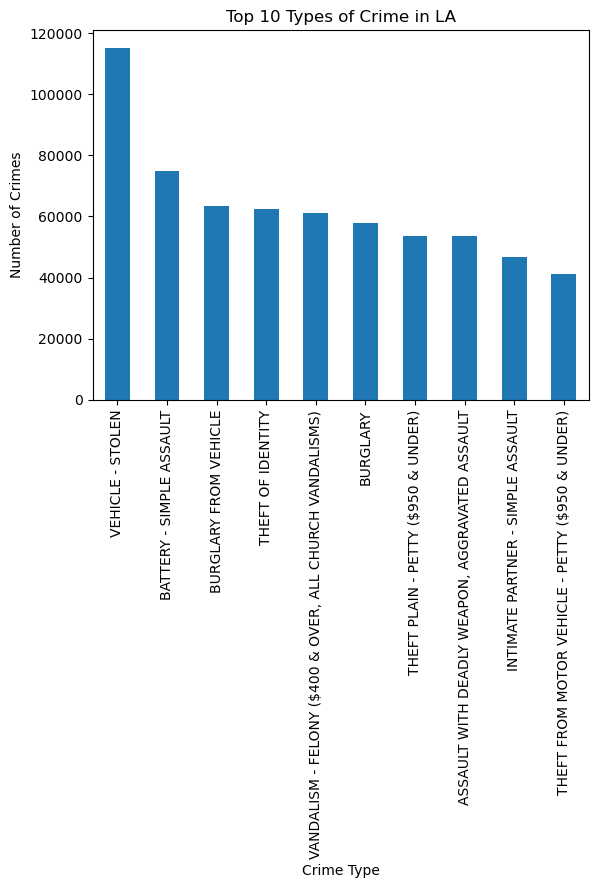

In [20]:
plt.figure()
crime_counts.plot(kind="bar")
plt.title("Top 10 Types of Crime in LA")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=90)
plt.show()

### Chart # 1 Analysis

- Based on the above chart showing the Top 10 Types of Crimes in LA, the grouped data by crime type shows that crimes involving stolen vehicles are most common, with **approximately 120,000 being stolen**, followed by simple assault and battery at **approximately 80,000 cases**. The remaining top crimes each occur between **40,000 and 60,000 times**, indicating that a smaller number of these crime types account for a large portion of total crimes being committed in LA.

In [21]:
area_counts = df.groupby("AREA").size()

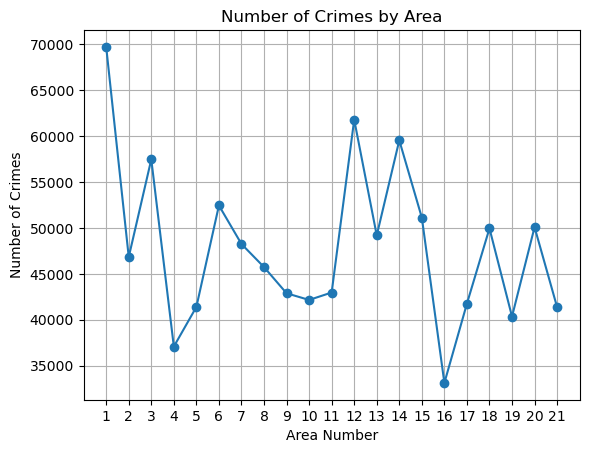

In [28]:
plt.figure()
area_counts.plot(kind="line", marker="o")
plt.title("Number of Crimes by Area")
plt.xlabel("Area Number")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.xticks(area_counts.index) # force to show only integers, since there is no area numbers with a decimal
plt.show()

### Chart #2 Analysis

- Based on the above chart showing the Number of Crimes by Area, the grouped data by area shows that **Area Number 1** has the most amount of crimes committed, with approximately **70,000 crimes committed**, followed by **Areas 12 and 13**. This chart indicates that certain areas are experiencing higher numbers of crime than others, highlighting patterns across LA that may require increased police presence.